In [91]:
import numpy as np, pandas as pd

df = pd.read_csv("data.csv")

numeric_cols = df.select_dtypes(include = "number").columns
ls = []
for col in numeric_cols:
    # z score
    Z_score =  ((df[col] - df[col].mean()) / df[col].std())

    # min max score
    min_max_score = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
    
    ls.append({
         'Column' : col,
         'Mean' : round(df[col].mean(),2),
         'Median' : round(df[col].median(),2),
         'Mode' : (df[col].mode()[0] if len(df[col].mode()) < 0 else "no Mode"),
         'STD' : df[col].std(),
         'z mean' : round(Z_score.mean(),3),
         'z std' : round(Z_score.std(),3),
         'MM Max' : round(min_max_score.max(),4),
         'MM Min' : round(min_max_score.min(),4),
         'MM Mean' : round(min_max_score.mean(),4)
     })


,Column,Mean,Median,Mode,STD,z mean,z std,MM Max,MM Min,MM Mean
0,sepal_length,5.84,5.80,5.0,0.828066,-0.0,1.0,1.0,0.0,0.4287
1,sepal_width,3.05,3.00,3.0,0.433594,-0.0,1.0,1.0,0.0,0.4392
2,petal_length,3.76,4.35,1.5,1.764420,0.0,1.0,1.0,0.0,0.4676
3,petal_width,1.20,1.30,0.2,0.763161,-0.0,1.0,1.0,0.0,0.4578


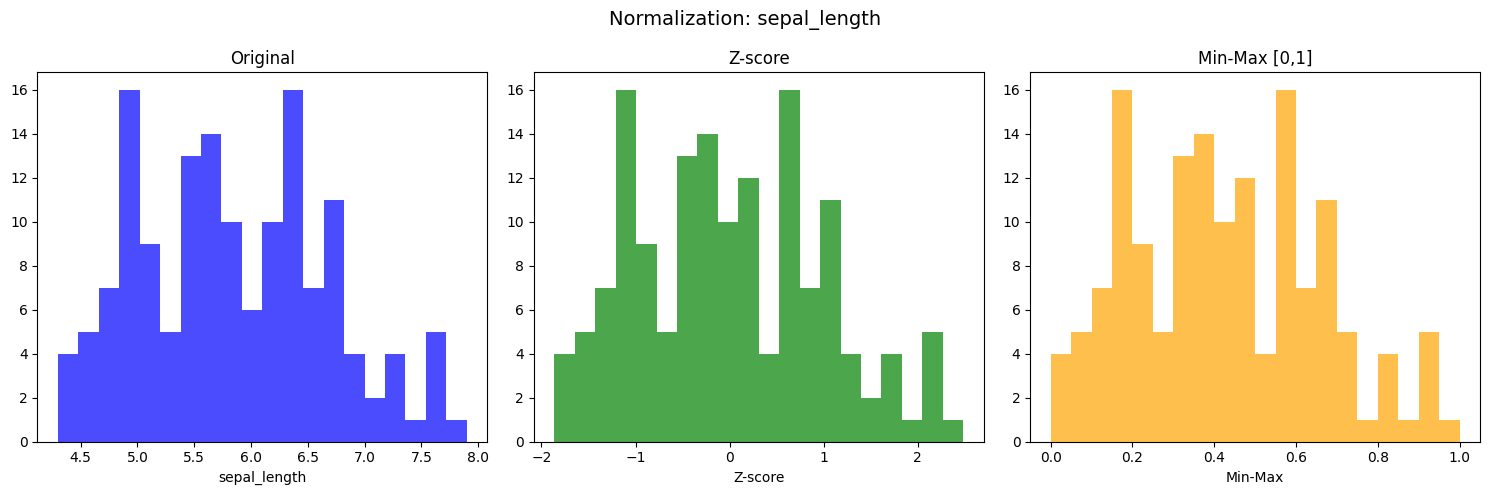

In [96]:
import matplotlib.pyplot as plt

# Pick FIRST numeric column (do this AFTER your loop)
first_col = numeric_cols[0]
original = df[first_col]

z_norm = (df[first_col] - df[first_col].mean()) / df[first_col].std()
mm_norm = (df[first_col] - df[first_col].min()) / (df[first_col].max() - df[first_col].min())

# 3 histograms side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'Normalization: {first_col}', fontsize=14)

axes[0].hist(original, bins=20, alpha=0.7, color='blue')
axes[0].set_title('Original')
axes[0].set_xlabel(first_col)

axes[1].hist(z_norm, bins=20, alpha=0.7, color='green')
axes[1].set_title('Z-score')
axes[1].set_xlabel('Z-score')

axes[2].hist(mm_norm, bins=20, alpha=0.7, color='orange')
axes[2].set_title('Min-Max [0,1]')
axes[2].set_xlabel('Min-Max')

plt.tight_layout()
plt.savefig('before_after_normalization.png', dpi=150, bbox_inches='tight')
plt.show()
